<a href="https://colab.research.google.com/github/sinhasurapto/House_Price_Prediction/blob/main/HousingPricesNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
dataset = pd.read_csv('/content/india_housing_prices.csv')
dataset

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249996,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,...,30,8,6,Low,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction
249996,249997,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,...,12,8,10,Low,No,No,Playground,South,Broker,Ready_to_Move
249997,249998,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,...,22,10,4,High,Yes,Yes,Playground,South,Builder,Under_Construction
249998,249999,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,...,18,3,7,Low,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move


In [3]:
# Dimensions of dataset
dataset.shape

(250000, 23)

In [4]:
# Columns in the dataset
dataset.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

In [5]:
# Dataset overview
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [6]:
# Statistical summary of the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,250000.0,125000.500000,72168.927986,1.0,62500.75,125000.50,187500.25,250000.00
BHK,250000.0,2.999396,1.415521,1.0,2.00,3.00,4.00,5.00
Size_in_SqFt,250000.0,2749.813216,1300.606954,500.0,1623.00,2747.00,3874.00,5000.00
Price_in_Lakhs,250000.0,254.586854,141.349921,10.0,132.55,253.87,376.88,500.00
Price_per_SqFt,250000.0,0.130597,0.130747,0.0,0.05,0.09,0.16,0.99
Year_Built,250000.0,2006.520012,9.808575,1990.0,1998.00,2007.00,2015.00,2023.00
Floor_No,250000.0,14.966800,8.948047,0.0,7.00,15.00,23.00,30.00
Total_Floors,250000.0,15.503004,8.671618,1.0,8.00,15.00,23.00,30.00
Age_of_Property,250000.0,18.479988,9.808575,2.0,10.00,18.00,27.00,35.00
Nearby_Schools,250000.0,5.499860,2.878639,1.0,3.00,5.00,8.00,10.00


In [7]:
# Unique values in each column
dataset.nunique()

,0
ID,250000
State,20
City,42
Locality,500
Property_Type,3
BHK,5
Size_in_SqFt,4501
Price_in_Lakhs,48700
Price_per_SqFt,100
Year_Built,34


In [9]:
# Identify unique prices
unique_prices = dataset['Price_in_Lakhs'].unique()
print("Unique values in 'price':")
print(unique_prices)
print(f"Total unique values: {len(unique_prices)}")

Unique values in 'price':
[489.76 195.52 183.79 ... 189.55 384.8  429.42]
Total unique values: 48700


In [10]:
# Check for null values in each column
null_values_per_column = dataset.isnull().any(axis=0)
null_values_per_column

,0
ID,False
State,False
City,False
Locality,False
Property_Type,False
BHK,False
Size_in_SqFt,False
Price_in_Lakhs,False
Price_per_SqFt,False
Year_Built,False


In [11]:
# Check for duplicate values
dataset.duplicated().sum()

np.int64(0)

In [12]:
# Dropping 'ID' column
dataset.drop(['ID'], inplace=True, axis=1)
dataset

,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,Furnished,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,Unfurnished,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,Semi-furnished,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,Furnished,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,Semi-furnished,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,Furnished,...,30,8,6,Low,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction
249996,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,Semi-furnished,...,12,8,10,Low,No,No,Playground,South,Broker,Ready_to_Move
249997,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,Furnished,...,22,10,4,High,Yes,Yes,Playground,South,Builder,Under_Construction
249998,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,Unfurnished,...,18,3,7,Low,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move


In [13]:
# Dropping 'Locality' column
dataset.drop(['Locality'], inplace=True, axis=1)
dataset

,State,City,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,Tamil Nadu,Chennai,Apartment,1,4740,489.76,0.10,1990,Furnished,22,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,Maharashtra,Pune,Independent House,3,2364,195.52,0.08,2008,Unfurnished,21,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,Punjab,Ludhiana,Apartment,2,3642,183.79,0.05,1997,Semi-furnished,19,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,Rajasthan,Jodhpur,Independent House,2,2741,300.29,0.11,1991,Furnished,21,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,Rajasthan,Jaipur,Villa,4,4823,182.90,0.04,2002,Semi-furnished,3,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,Gujarat,Ahmedabad,Independent House,5,1995,274.75,0.14,1995,Furnished,19,...,30,8,6,Low,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction
249996,Tamil Nadu,Chennai,Apartment,1,2293,13.40,0.01,2013,Semi-furnished,15,...,12,8,10,Low,No,No,Playground,South,Broker,Ready_to_Move
249997,Telangana,Warangal,Villa,4,2910,236.94,0.08,2003,Furnished,21,...,22,10,4,High,Yes,Yes,Playground,South,Builder,Under_Construction
249998,Odisha,Cuttack,Villa,1,1149,141.66,0.12,2007,Unfurnished,14,...,18,3,7,Low,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move


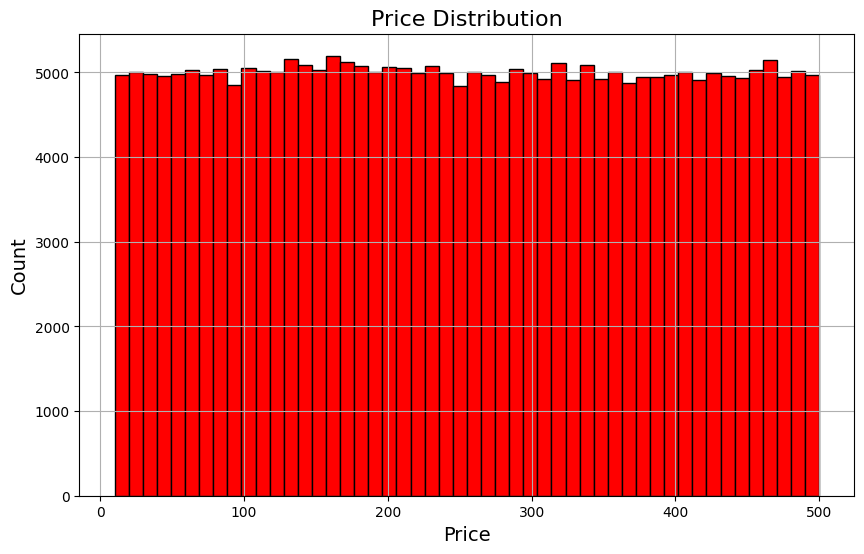

In [16]:
# Check the distribution of prices
plt.figure(figsize=(10, 6))
plt.hist(dataset['Price_in_Lakhs'], bins=50, color='red', edgecolor='black')
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

In [15]:
# Ordinal columns
ordinal_columns = ['Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Facing', 'Security']

# Categories of the ordinal columns
categories = [['Apartment', 'Independent House', 'Villa'],
              ['Unfurnished', 'Semi-furnished', 'Furnished'],
              ['Low', 'Medium', 'High'],
              ['South', 'East', 'West', 'North'],  # In India, west facing and north facing properties are more valuable
              ['No', 'Yes']]

# Ordinal encoding
encoder = OrdinalEncoder(categories=categories)
dataset[ordinal_columns] = encoder.fit_transform(dataset[ordinal_columns])

In [20]:
# Categorical columns
categorical_col = [column for column in dataset.columns if dataset[column].dtype == 'object']

# Numerical columns
numerical_col = [column for column in dataset.columns if dataset[column].dtype != 'object']

In [21]:
# Number of categorical and numerical columns
len(categorical_col), len(numerical_col)

(6, 15)

In [23]:
# Change to lower case
for column in categorical_col:
    dataset[column] = dataset[column].str.lower()

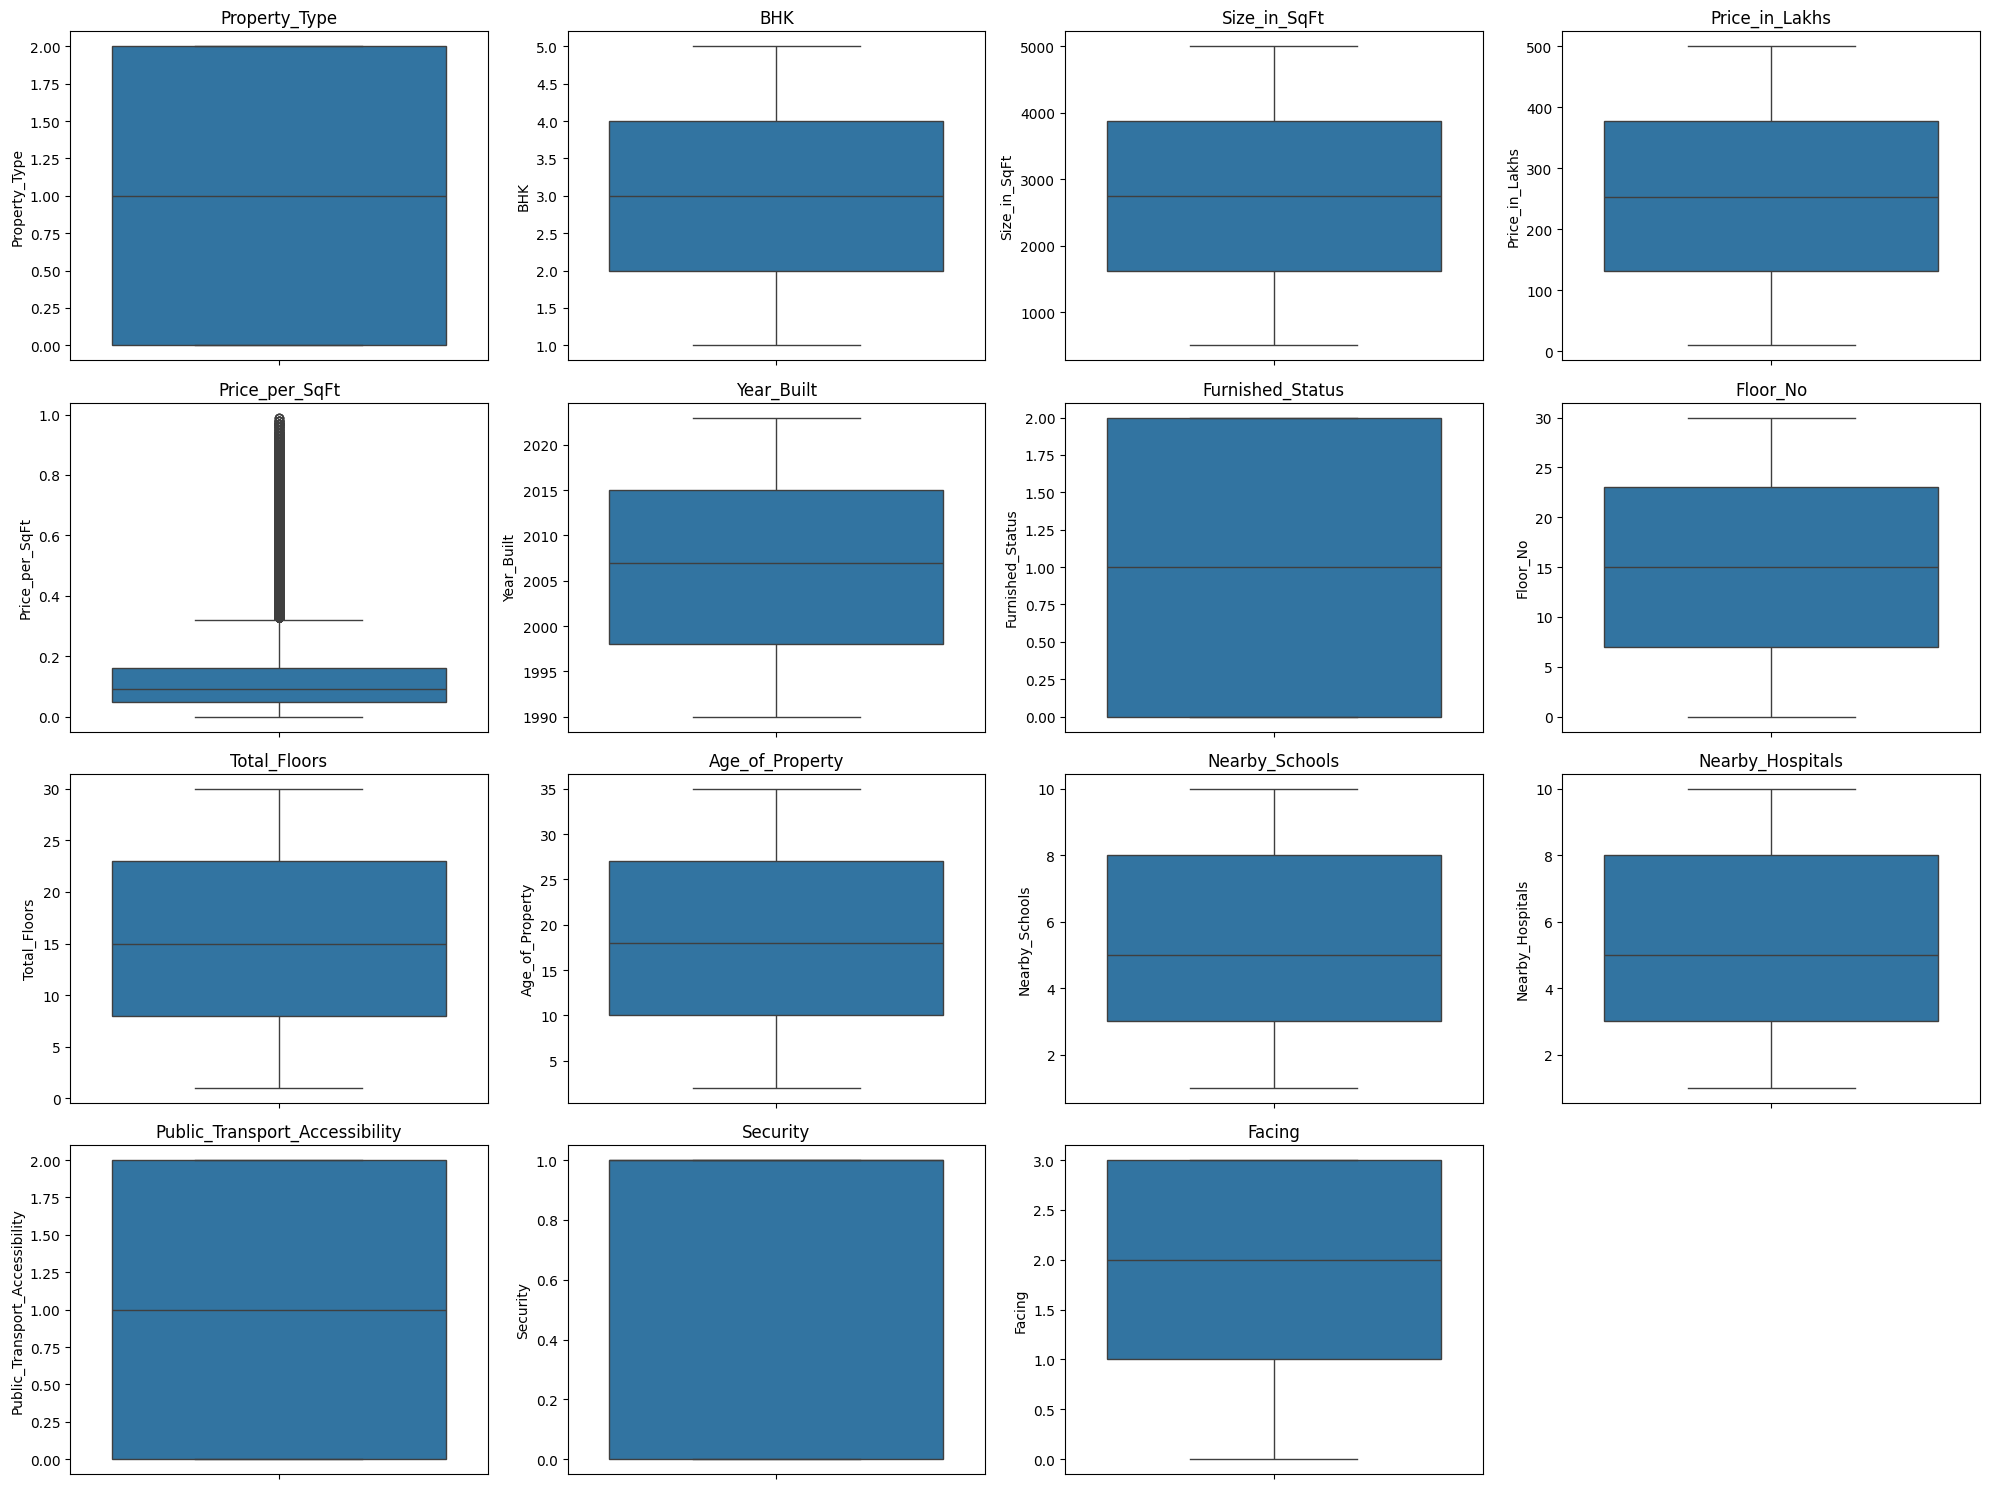

In [53]:
# Create a box plot for each feature
plt.figure(figsize=(20, 15))

# Iterate over the features and create a box plot for each
for i, feature in enumerate(numerical_col, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=dataset[feature])
    plt.title(feature)

# Adjust the layout
plt.tight_layout()
plt.show()

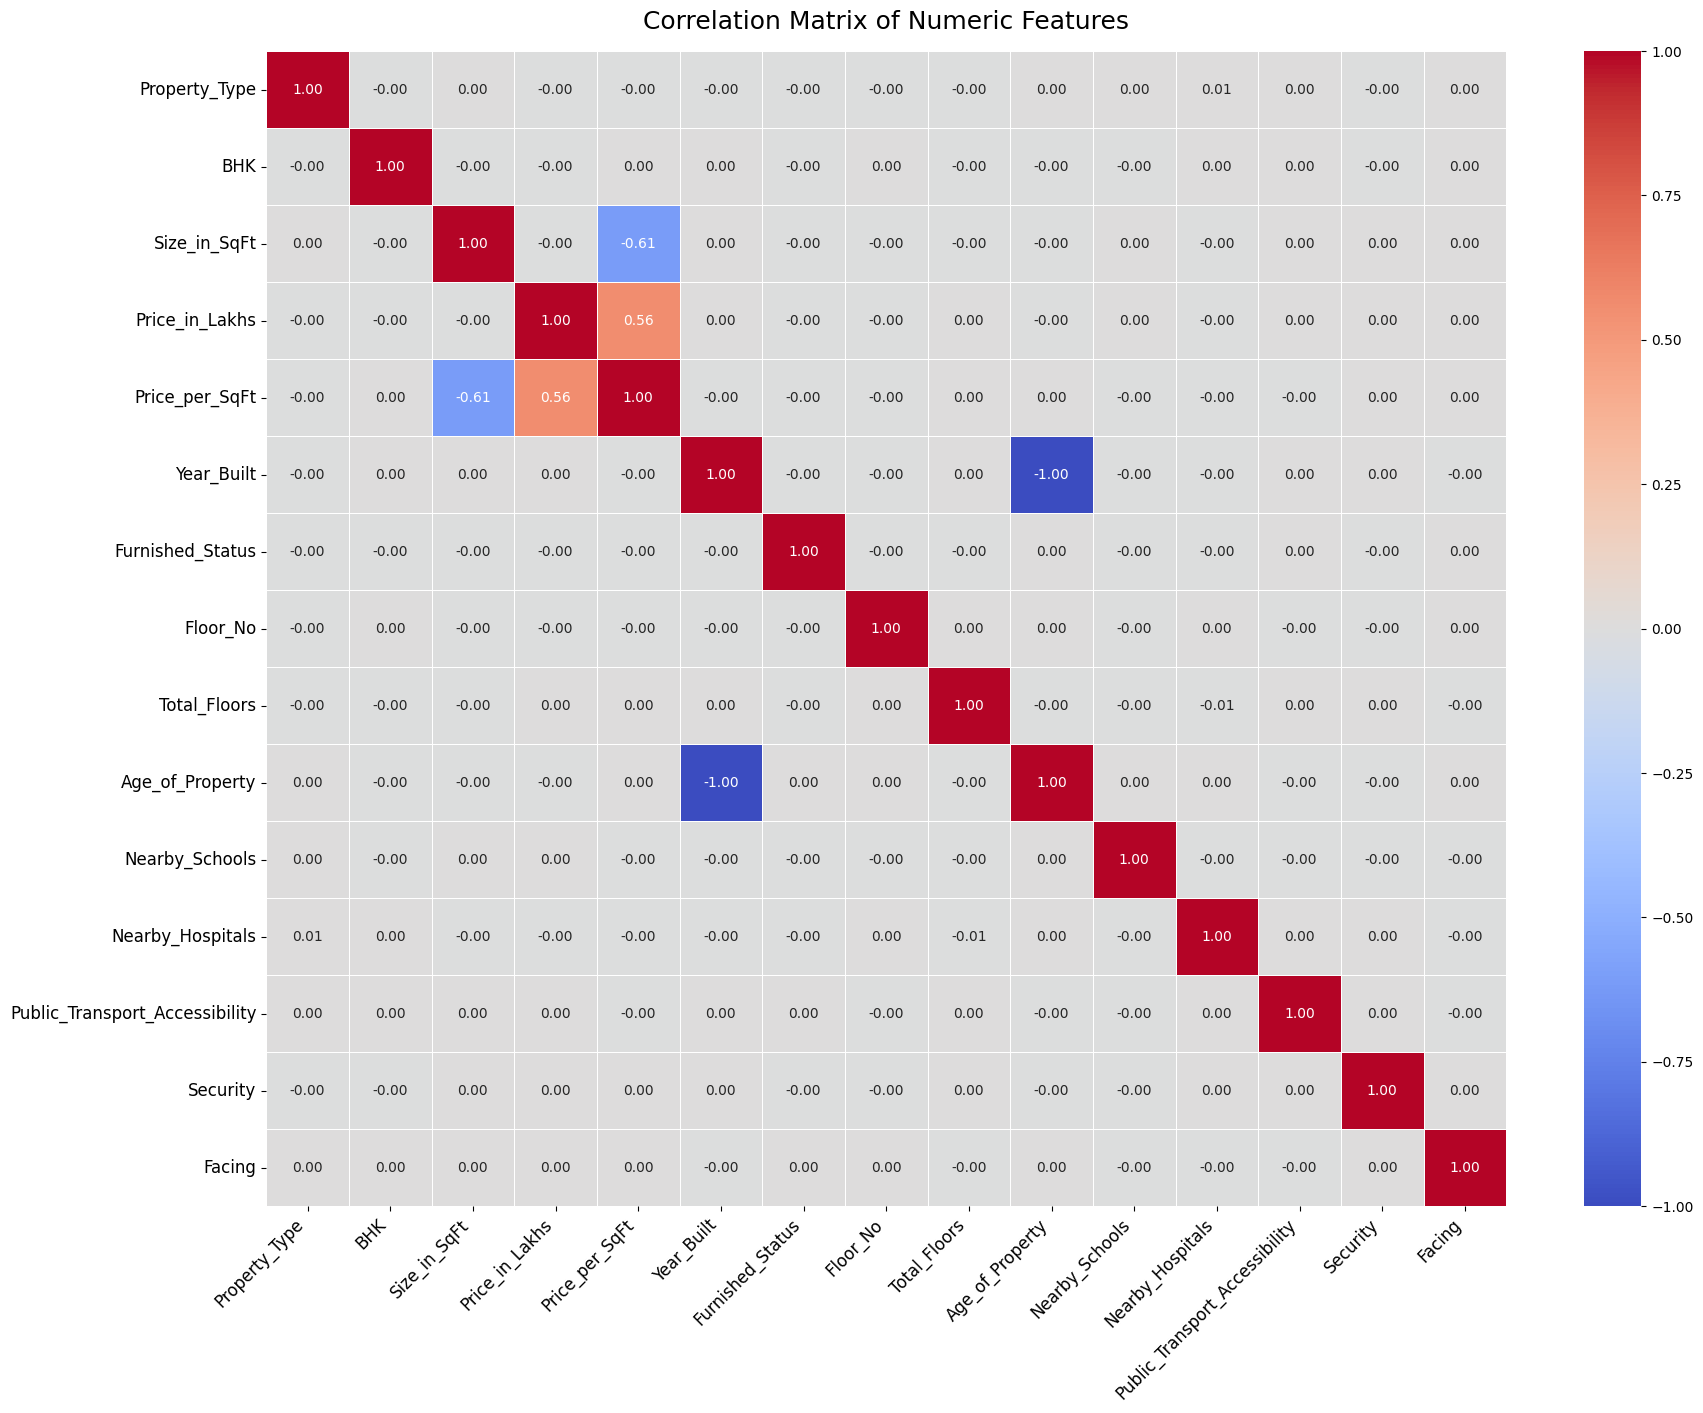

In [24]:
# Correlation plot
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(dataset[numerical_col].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='white')
heatmap.set_title('Correlation Matrix of Numeric Features', fontdict={'fontsize': 18}, pad=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

In [54]:
# Updated columns
dataset.columns

Index(['State', 'City', 'Property_Type', 'BHK', 'Size_in_SqFt',
       'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status',
       'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools',
       'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space',
       'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status'],
      dtype='object')

In [61]:
# Input data
X = dataset.drop('Price_in_Lakhs', axis=1)

# Output data
y = dataset['Price_in_Lakhs']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [62]:
# Size of testing and training datasets
len(X_test), len(X_train)

(50000, 200000)

In [63]:
# Converting to dictionary
train_dicts = X_train.to_dict(orient='records')
test_dicts = X_test.to_dict(orient='records')

In [64]:
train_dicts

[{'State': 'karnataka',
  'City': 'mysore',
  'Property_Type': 2.0,
  'BHK': 4,
  'Size_in_SqFt': 2976,
  'Price_per_SqFt': 0.07,
  'Year_Built': 2020,
  'Furnished_Status': 0.0,
  'Floor_No': 6,
  'Total_Floors': 27,
  'Age_of_Property': 5,
  'Nearby_Schools': 5,
  'Nearby_Hospitals': 5,
  'Public_Transport_Accessibility': 2.0,
  'Parking_Space': 'no',
  'Security': 1.0,
  'Amenities': 'playground, garden, pool',
  'Facing': 3.0,
  'Owner_Type': 'broker',
  'Availability_Status': 'under_construction'},
 {'State': 'delhi',
  'City': 'dwarka',
  'Property_Type': 0.0,
  'BHK': 5,
  'Size_in_SqFt': 2990,
  'Price_per_SqFt': 0.09,
  'Year_Built': 2010,
  'Furnished_Status': 2.0,
  'Floor_No': 24,
  'Total_Floors': 16,
  'Age_of_Property': 15,
  'Nearby_Schools': 10,
  'Nearby_Hospitals': 7,
  'Public_Transport_Accessibility': 1.0,
  'Parking_Space': 'no',
  'Security': 1.0,
  'Amenities': 'playground, gym, clubhouse, pool',
  'Facing': 3.0,
  'Owner_Type': 'owner',
  'Availability_Status':

In [28]:
# To automatically handle categorical columns
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_test = dv.transform(test_dicts)

In [29]:
# Import important libraries for the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict the values
rf_predictions = rf_model.predict(X_test)

# Compute the results for the Random Forest Regressor model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print("Random Forest MSE score: ", rf_mse)
print("Random Forest R² score: ", rf_r2)
print("Random Forest MAE score: ", rf_mae)

Random Forest MSE score:  79.39599994634257
Random Forest R² score:  0.996049982236087
Random Forest MAE score:  6.900417441999999


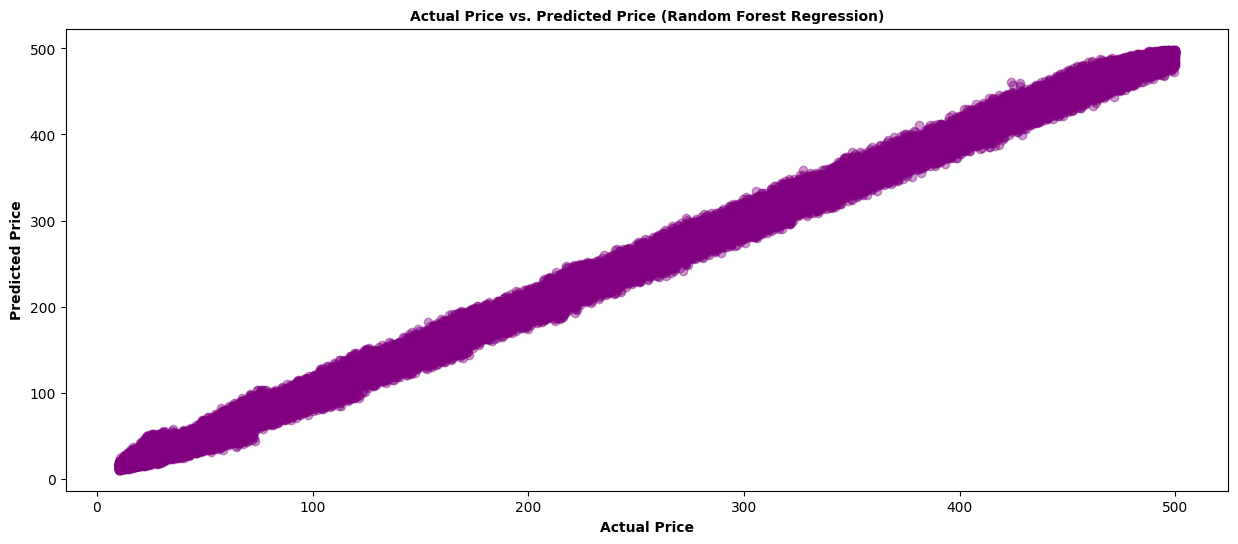

In [30]:
# Plot Actual Price vs. Predicted Price (Random Forest Regression)
plt.figure(figsize = ((15, 6)))
plt.scatter(x=y_test, y=rf_predictions, color='purple', alpha=0.4)
plt.title('Actual Price vs. Predicted Price (Random Forest Regression)', weight='bold', fontsize=10)
plt.xlabel('Actual Price', weight ='bold')
plt.ylabel('Predicted Price', weight ='bold')
plt.show()

In [37]:
# Import important libraries for the Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Train the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Predict the values
gbr_predictions = gbr_model.predict(X_test)

# Compute the results for the Gradient Boosting Regressor model
gbr_mse = mean_squared_error(y_test, gbr_predictions)
gbr_r2 = r2_score(y_test, gbr_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
print("Gradient Boosting MSE score: ", gbr_mse)
print("Gradient Boosting R² score: ", gbr_r2)
print("Gradient Boosting MAE score: ", gbr_mae)

Gradient Boosting MSE score:  188.4504700410096
Gradient Boosting R² score:  0.9906244306415585
Gradient Boosting MAE score:  10.898809790994575


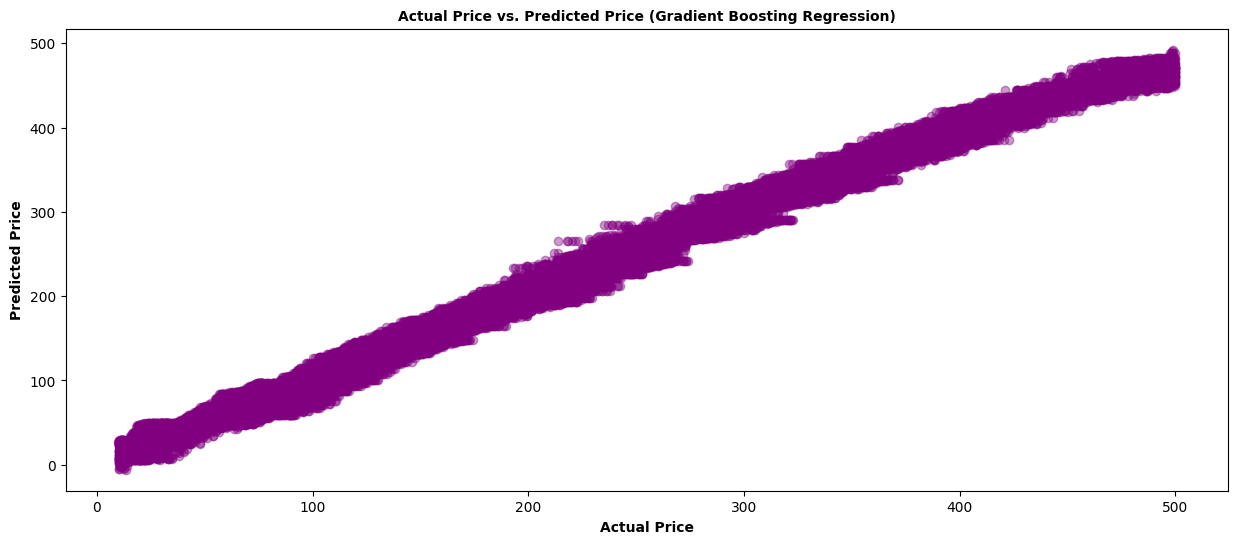

In [38]:
# Plot Actual Price vs. Predicted Price (Gradient Boosting)
plt.figure(figsize = ((15, 6)))
plt.scatter(x = y_test, y = gbr_predictions, color='purple', alpha=0.4)
plt.title('Actual Price vs. Predicted Price (Gradient Boosting Regression)', weight = 'bold', fontsize = 10)
plt.xlabel('Actual Price', weight = 'bold')
plt.ylabel('Predicted Price', weight = 'bold')
plt.show()

In [40]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.3 MB/s eta 0:00:00


In [41]:
# Train the CatBoost Regression model as meta-model with Random Forest and Gradient Boosting as base models

# Import libraries
from catboost import CatBoostRegressor

# Instantiate the CatBoostRegressor model as meta-model
cb_model = CatBoostRegressor(loss_function='RMSE')

# Predictions for Random Forest and Gradient Boosting on training set
y_train_random_forest_regressor = rf_model.predict(X_train)
y_train_gradient_boosting = gbr_model.predict(X_train)

# Stack train predictions for the meta-model
stacked_train_preds = np.column_stack((y_train_random_forest_regressor, y_train_gradient_boosting))

# Fit the model
cb_model.fit(stacked_train_preds, y_train)

Learning rate set to 0.094568
0:	learn: 128.2485061	total: 85.3ms	remaining: 1m 25s
1:	learn: 116.5068540	total: 109ms	remaining: 54.4s
2:	learn: 105.8861351	total: 157ms	remaining: 52.1s
3:	learn: 96.1563324	total: 179ms	remaining: 44.5s
4:	learn: 87.3808780	total: 202ms	remaining: 40.2s
5:	learn: 79.4148991	total: 223ms	remaining: 37s
6:	learn: 72.2059543	total: 245ms	remaining: 34.8s
7:	learn: 65.6806006	total: 268ms	remaining: 33.2s
8:	learn: 59.7617011	total: 289ms	remaining: 31.8s
9:	learn: 54.3528245	total: 313ms	remaining: 30.9s
10:	learn: 49.4686442	total: 334ms	remaining: 30.1s
11:	learn: 45.0224263	total: 357ms	remaining: 29.4s
12:	learn: 41.0064255	total: 380ms	remaining: 28.8s
13:	learn: 37.4206590	total: 401ms	remaining: 28.2s
14:	learn: 34.0930262	total: 422ms	remaining: 27.7s
15:	learn: 31.0911576	total: 449ms	remaining: 27.6s
16:	learn: 28.3907173	total: 470ms	remaining: 27.2s
17:	learn: 25.9347054	total: 492ms	remaining: 26.8s
18:	learn: 23.7040014	total: 514ms	remain

In [42]:
# Make predictions for the meta-model

# Stack test predictions
stacked_test_preds = np.column_stack((rf_predictions, gbr_predictions))

# Prediction
cb_predictions = cb_model.predict(stacked_test_preds)

In [43]:
# Evaluate the meta-model

# Mean Squared Error (MSE)
cb_mse = mean_squared_error(y_test, cb_predictions)
print('CatBoost MSE score: ', cb_mse)

# R-squared Score
cb_r2 = r2_score(y_test, cb_predictions)
print('CatBoost R2 score: ', cb_r2)

# Mean Absolute Error (MAE)
cb_mae = mean_absolute_error(y_test, cb_predictions)
print('CatBoost MAE score: ', cb_mae)

CatBoost MSE score:  84.34133410580608
CatBoost R2 score:  0.9958039477029673
CatBoost MAE score:  7.091619053069484


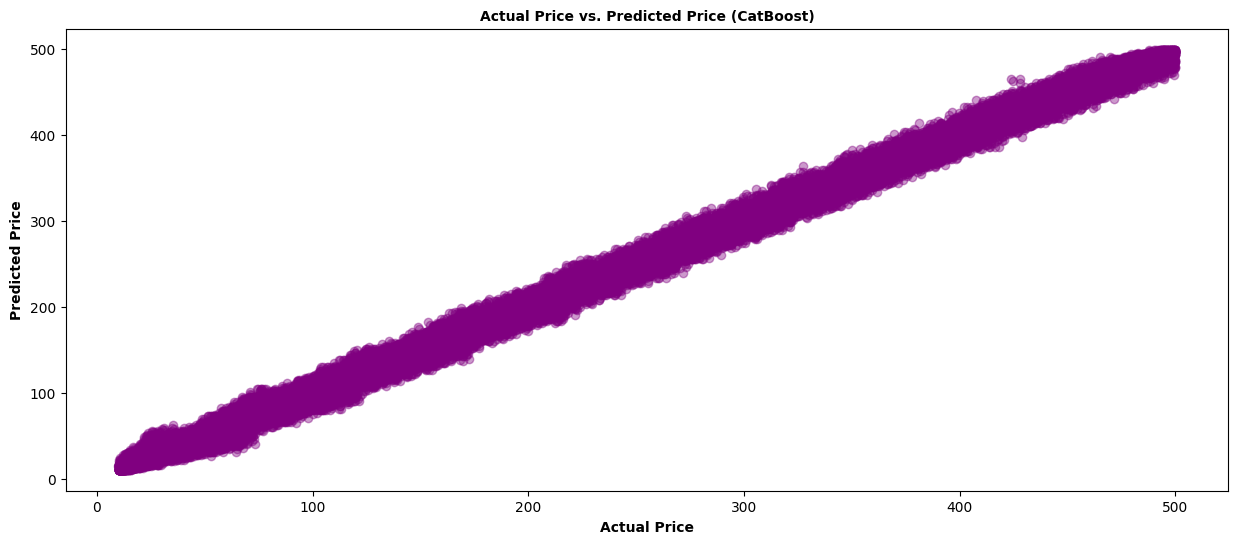

In [44]:
# Plot Actual Price vs. Predicted Price (CatBoost)
plt.figure(figsize = ((15, 6)))
plt.scatter(x=y_test, y = cb_predictions, color='purple', alpha=0.4)
plt.title('Actual Price vs. Predicted Price (CatBoost)', weight = 'bold', fontsize = 10)
plt.xlabel('Actual Price', weight = 'bold')
plt.ylabel('Predicted Price', weight = 'bold')
plt.show()

Text(0.5, 0, 'Model')

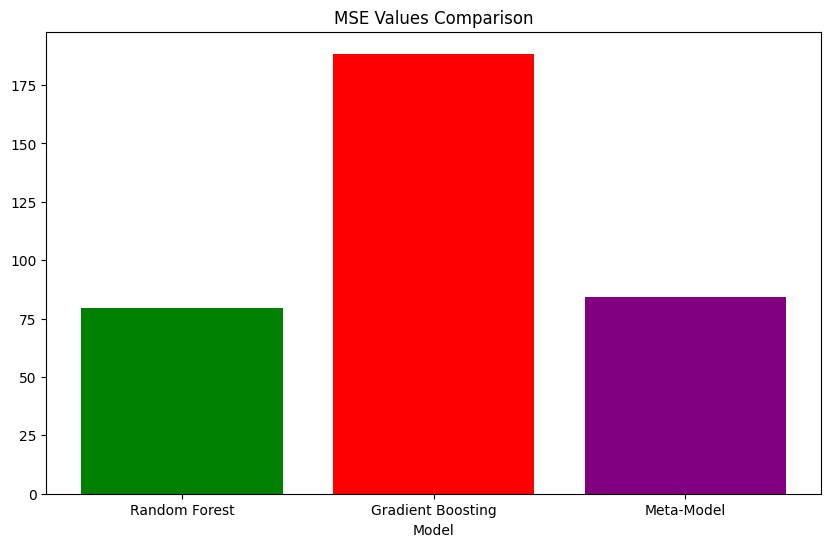

In [45]:
# Bar-chart for MSE values
labels = ['Random Forest', 'Gradient Boosting', 'Meta-Model']
mse_values = [rf_mse, gbr_mse, cb_mse]
plt.figure(figsize=(10, 6))
plt.title('MSE Values Comparison')
plt.bar(labels, mse_values, color=['green', 'red', 'purple'])
plt.xlabel('Model')

Text(0.5, 0, 'Model')

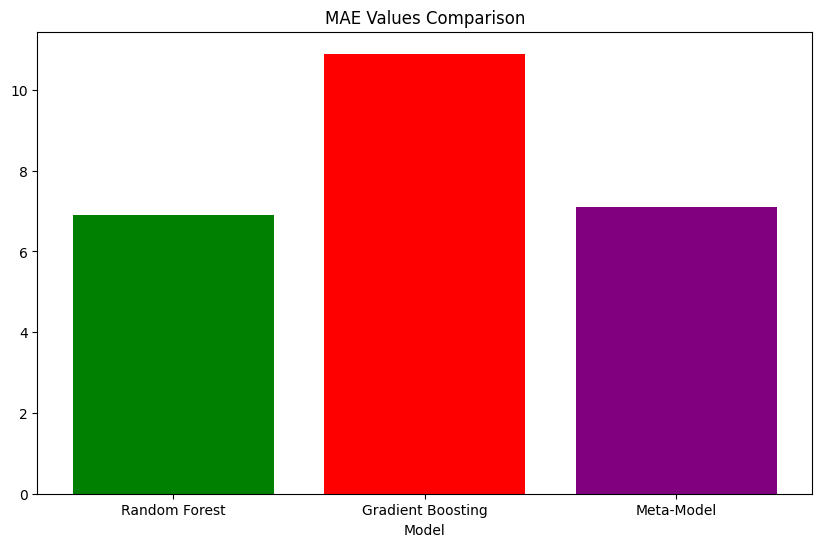

In [46]:
# Bar-chart for MAE values
labels = ['Random Forest', 'Gradient Boosting', 'Meta-Model']
mae_values = [rf_mae, gbr_mae, cb_mae]
plt.figure(figsize=(10, 6))
plt.title('MAE Values Comparison')
plt.bar(labels, mae_values, color=['green', 'red', 'purple'])
plt.xlabel('Model')

Text(0.5, 0, 'Model')

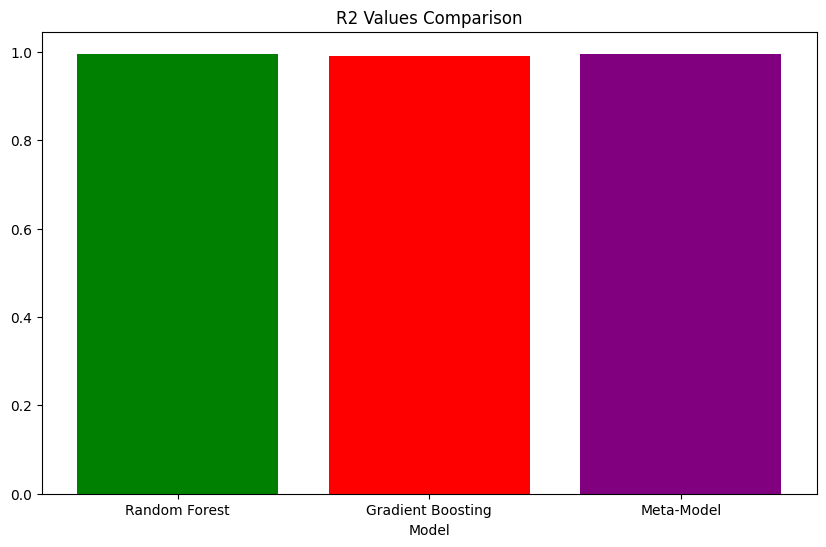

In [47]:
# Bar-chart for R2 values
labels = ['Random Forest', 'Gradient Boosting', 'Meta-Model']
r2_values = [rf_r2, gbr_r2, cb_r2]
plt.figure(figsize=(10, 6))
plt.title('R2 Values Comparison')
plt.bar(labels, r2_values, color=['green', 'red', 'purple'])
plt.xlabel('Model')

In [48]:
# Save dictionary vectorizer
import pickle
with open('dict_vectorizer.pkl', 'wb') as file:
  pickle.dump(dv, file)

In [49]:
# Save the Random Forest model
import pickle
with open('random_forest_model_new.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [50]:
# Save the Gradient Boosting model
with open('gradient_boosting_model_new.pkl', 'wb') as file:
    pickle.dump(gbr_model, file)

In [51]:
# Save the CatBoost model
with open('cat_boost_model_new.pkl', 'wb') as file:
    pickle.dump(cb_model, file)